# 第3章  决策树

## 本章内容

* 决策树简介
* 在数据集中度量一致性
* 使用递归构造决策树
* 使用Matplotlib绘制树形图

## 3.1 决策树 概述

**决策树（Decision Tree）**算法是一种基本的分类和回归方法，是最经常使用的数据挖掘算法之一，但是这里我们先讨论用于**分类**的决策树。

**决策树模型**：呈树形结构，在分类问题中，表示基于特征对实例进行分类的过程。它可以认为是 **if-then**规则的集合，也可以认为是定义在特征空间与类空间上的条件概率分布。

**决策树**学习通常包含以下三个步骤：

1. 特征选择
2. 决策树生成
3. 决策树修剪

## 3.2 决策树 应用场景

这里以一个经典的“二十个问题”的游戏描述开始：

游戏规则：

参与游戏的一方在脑海中构想一个事物，其他参与者向他提问，只允许提20个问题，问题的答案也只能用对或者错回答。问问题的人通过推断分解，逐步的缩小猜想事物的范围，最后得到游戏的答案 --- 是一个什么样的场景。


另一个比较能说明问题的例子是邮件分类系统，大致工作流程如下：

![](images/decision_tree_email.jpg)

首先检测发送邮件的域名地址，如果地址为 myEmployer.com，则将其放在分类 “无聊时需要阅读的邮件”中。如果邮件不是来自这个域名，则检测邮件内容是否包含单词“曲棍球”，如果包含则将邮件归类到“需要及时处理的朋友邮件”，否则归类到“无需阅读的垃圾邮件”。

## 3.3 决策树 定义

**分类决策树模型**是一种描述对实例进行分类的树形结构。决策树由节点（node）和有向边（directed edge）组成。节点有两种类型：

* 内部节点（internal node）：表示一个特征或属性
* 叶节点（leaf node）：表示一个类

用决策树分类，从根节点开始，对实例的某一特征进行测试，根据测试结果，将实例分配到其子节点，此时，每个子节点对应着该特征的一个取值。如此递归地对实例进行测试并分配，直至达到叶节点，最后将实例分配到到叶节点的类中。

## 3.4 决策树 工作原理

**信息熵 & 信息增益**

**熵（entropy）**：指的是体系的混乱程度，在不同的学科中也有引申出的更为具体的定义，是领域十分重要的参量。(后面详解)

**信息熵（香农熵）**：是一种信息的度量方式，表示信息的混乱程度，也就是说：信息越有序，信息熵越低。例如：火柴有序放在火柴盒里，熵值最低，相反，熵值很高。(后面详解)

**信息增益**：在划分数据集前后信息发生的变化成为信息增益。(后面详解)

**决策树构造**（伪代码）

*createBranch()*
```
检测数据集中每个子项是否属于同一分类：
    If so return 类标签;
    Else
        寻找划分数据集的最好特征
        划分数据集
        创建分支点
            for 每个划分的子集
                调用构建决策树函数，并增加返回结果到分支节点中
        return 分直节点
```

## 3.5 决策树 工作流程

1. 收集数据：可以使用任何方法
2. 准备数据：树构造算法只适用于标称型数据，因此数值型数据必须离散化
3. 分析数据：可以使用任何方法，构造树完成之后，我们应该检查图像是否符合预期
4. 训练算法：构造树的数据结构
5. 测试算法：使用经验树计算错误率
6. 使用算法：此步骤可以适用于任何监督学习算法，而使用决策树可以更好地理解数据的内在含义

## 3.6 决策树 特点

* **优点**：计算复杂度不高，输出结果易于理解，对中间值的缺失不敏感，可以处理不相关特征数据；
* **缺点**：可能会产生过度匹配的问题
* **使用数据类型**：数值型和标称型

## 3.7 决策树 项目实践

### 实践1： 判定是否是鱼类

#### 项目概述

根据以下两个特征，判断该动物是否为鱼类。

特征：

1. 不浮出水面是否可以生存
2. 是否有脚蹼

#### 开发流程

1. 收集数据：可以使用任何方法
2. 准备数据：树构造算法只适用于标称型数据，因此数值型数据必须离散化
3. 分析数据：可以使用任何方法，构造树完成之后，我们应该检查图形是否符合预期
4. 训练算法：构造树的数据结构
5. 测试算法：使用决策树执行分类
6. 使用算法：此步骤可以适用于任何监督学习算法，而使用决策树可以更好地理解数据的内在含义

**1. 收集数据**：可以使用任何方法

假设我们得到的数据集如下：

![](images/fish_or_not.png)

**2. 准备数据**：树构造算法只适用于标称型数据，因此数值型数据必须离散化

现在我们想要决定依据第一个特征还是第二个特征划分数据，但是在这之前，我们必须采用量化的方法判断如何划分数据。

我们构建自己的 *createDataSet()* 方法，将标称型的数据离散化。

In [1]:
# 构建数据样本集（数据变化）
def createDataSet():
    dataSet = [
        [1, 1, 'yes'],
        [1, 1, 'yes'],
        [1, 0, 'no'],
        [0, 1, 'no'],
        [0, 1, 'no']
    ]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

**3. 分析数据**：可以使用任何方法，构造树完成之后，我们应该检查图形是否符合预期


**3.1 信息增益（information gain）**

划分数据集的大原则是：**将无序的数据变得更加有序。**
组织杂乱无章数据的一种方法：**使用信息论度量信息，信息论是量化处理信息的分支科学。**

**信息增益 定义**

在划分数据之前后，信息发生的变化成为信息增益。

**如何计算信息增益**

**香农熵（简称熵）**：是集合信息的度量方式，定义为信息的期望值。

**信息 定义**

如果待分类的事物可能被划分在多个分类中，则符号$x_i$事物的信息定义为：

$$l(x_i) = -\log_2{p(x_i)}$$

其中 $p(x_i)$ 是选择该分类的概率。

但是为了计算熵，需要计算所有类别所有可能值包含的信息期望值，通过如下公式得到：

$$H = -\sum_{i=1}^{n}p(x_i)\log_2{p(x_i)}$$

其中$n$为分类的数目。

了解了**香农熵**计算方式之后，我们来实现香农熵的函数：

In [2]:
# 计算给定数据集的香农熵的函数

from math import log

def calcShannonEnt(dataSet):
    # 数据样本中的实例总数
    numEntries = len(dataSet)
    # 分类标签出现次数
    labelCounts = {}
    # 遍历数据集中每个特征向量
    for featVec in dataSet:
        # 获取分类标签
        currentLabel = featVec[-1]
        # 为所有可能的分类创建存储字典，如果当前键值不存在，则加入。每个键值记录了当前类别出现的次数
        # key: 分类标签  value：出现的次数
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
        
    # 对比标签的占比，求出标签的香农熵
    shannonEnt = 0.0
    for key in labelCounts:
        # 使用所有分类标签的发生频率计算类别出现的概率
        prob = float(labelCounts[key])/numEntries
        # 计算香农熵
        shannonEnt -= prob * log(prob, 2)
    return shannonEnt

获取熵之后，我们就可以按照获取最大信息增益的方法划分数据集了。

> 还有一种度量数据无需程度的方法：**基尼不纯度(Gini impurity)**，简单地说就是从一个数据集中随机选取子项，度量其被错误分类到其他类别中的概率。

**3.2 划分数据集**

有了上面的知识储备后，我们就可以开始划分数据集并度量划分数据集的熵信息，判断是否正确划分数据集了。

划分数据集的函数如下：

In [3]:
# 按照给定的特征划分数据集
def splitDataSet(dataSet, axis, value):
    """splitDataSet(通过遍历dataSet数据集，求出index对应的colnum列的值为value的行)
        就是依据index列进行分类，如果index列的数据等于 value的时候，就要将 index 划分到我们创建的新的数据集中
    Args:
        dataSet 数据集                 待划分的数据集
        axis 表示每一行的index列        划分数据集的特征
        value 表示index列对应的value值   需要返回的特征的值。
    Returns:
        index列为value的数据集【该数据集需要排除index列】
    """
    retDataSet = []
    for featVec in dataSet:
        # 抽取axis列的值为value的数据
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            # extend 合并数据
            reducedFeatVec.extend(featVec[axis + 1:])
            # 追加到数据list中
            retDataSet.append(reducedFeatVec)
    return retDataSet

接下来我们将遍历整个数据集，循环计算香农熵和划分数据集，找到最好的特征划分方式，熵计算将会告诉我们如何划分数据集是最好的数据组织方式。

In [7]:
# 选择最好的数据集划分方式
def chooseBestFeatureToSplit(dataSet):
    """
    Args:
        dataSet 数据集
    Returns:
        bestFeature 最优的特征列
    """
    # 获取第一行有多少特征，由于最后一列是分类标签，因此数量-1
    numFeatures = len(dataSet[0]) - 1
    # label的信息熵
    baseEntropy = calcShannonEnt(dataSet)
    # 最优的信息增益值, 和最优的Featurn编号
    bestInfoGain, bestFeature = 0.0, -1
    # iterate over all the features
    for i in range(numFeatures):
        # create a list of all the examples of this feature
        # 获取每一个实例的第i+1个feature，组成list集合
        featList = [example[i] for example in dataSet]
        # get a set of unique values
        # 获取剔重后的集合，使用set对list数据进行去重
        uniqueVals = set(featList)
        # 创建一个临时的信息熵
        newEntropy = 0.0
        # 遍历某一列的value集合，计算该列的信息熵 
        # 遍历当前特征中的所有唯一属性值，对每个唯一属性值划分一次数据集，计算数据集的新熵值，并对所有唯一特征值得到的熵求和。
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        # gain[信息增益]: 划分数据集前后的信息变化， 获取信息熵最大的值
        # 信息增益是熵的减少或者是数据无序度的减少。最后，比较所有特征中的信息增益，返回最好特征划分的索引值。
        infoGain = baseEntropy - newEntropy
        print('infoGain=', infoGain, 'bestFeature=', i, baseEntropy, newEntropy)
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    print('bestFeature = ', bestFeature)
    return bestFeature

可以看到，原始数据中，第0个特征是最好的用于划分数据集的特征。

**4. 训练算法**：构造树的数据结构

从数据集构造决策树算法所需要的子功能模块已经完成了，其工作原理如下：

* 得到原始数据集
* 基于做好的属性值划分数据集
    * 由于特征值可能多于两个，因此可能存在大于两个分支的数据集划分
* 首次划分后，数据将被向下传递到树分支的下一个节点
* 根据实际情况，可再次划分数据

因此我们可以采用递归的原则处理数据集。递归结束的条件是：

**程序遍历完所有划分数据集的属性，或者每个分支下的所有实例都具有相同的分类。如果所有实例具有相同的分类，则得到一个叶子节点或者终止块。**

如上述分类鱼类与非鱼类的例子描述，刻画出如下的数据路径：

![](images/fish_data_flow.png)

但是，有些情况下，我们处理了数据集所有的属性，但是类标签在叶子节点上依然不是唯一的，此时我们就需要采用多数表决的方式决定该叶子节点的分类。

In [5]:
# 分类表决决定叶子节点分类
import operator

def majorityCnt(classList):
    classCount = {}
    # 遍历所有的标签列表，统计标签数量
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    # 对统计结果进行排序
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
    return sortedClassCount[0][0]

In [20]:
# 创建树的数据结构
def createTree(dataSet, labels):
    # 获取分类标签列表
    classList = [example[-1] for example in dataSet]
    # 如果数据集的最后一列的第一个值出现的次数=整个集合的数量，也就说只有一个类别，就只直接返回结果就行
    # 第一个停止条件：所有的类标签完全相同，则直接返回该类标签。
    # count() 函数是统计括号中的值在list中出现的次数
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 如果数据集只有1列，那么最初出现label次数最多的一类，作为结果
    # 第二个停止条件：使用完了所有特征，仍然不能将数据集划分成仅包含唯一类别的分组。
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)

    # 选择最优的列，得到最优列对应的label含义
    bestFeat = chooseBestFeatureToSplit(dataSet)
    # 获取label的名称
    bestFeatLabel = labels[bestFeat]
    # 初始化myTree
    myTree = {bestFeatLabel: {}}
    # 注：labels列表是可变对象，在PYTHON函数中作为参数时传址引用，能够被全局修改
    # 所以这行代码导致函数外的同名变量被删除了元素，造成例句无法执行，提示'no surfacing' is not in list
    del(labels[bestFeat])
    # 取出最优列，然后它的branch做分类
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        # 求成剩余标签Label
        subLabels = labels[:]
        # 遍历当前选择的特征包含的所有属性，在每个数据集划分上递归调用createTree()
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree

import copy

myDat, classL = createDataSet()
myTree = createTree(myDat, copy.deepcopy(classL))
myTree

infoGain= 0.4199730940219749 bestFeature= 0 0.9709505944546686 0.5509775004326937
infoGain= 0.17095059445466854 bestFeature= 1 0.9709505944546686 0.8
bestFeature =  0
infoGain= 0.9182958340544896 bestFeature= 0 0.9182958340544896 0.0
bestFeature =  0


{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

**使用Matplotlib注解绘制树形图**

**annitations**：Matplotlib提供的注解工具，可以附带文字、箭头等。

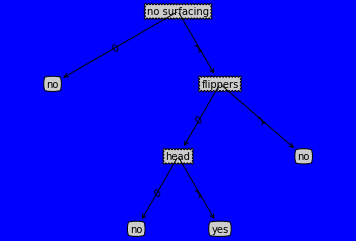

In [27]:
# 附上最终代码
import matplotlib.pyplot as plt

# 定义文本框 和 箭头格式 【 sawtooth 波浪方框, round4 矩形方框 , fc表示字体颜色的深浅 0.1~0.9 依次变浅，没错是变浅】
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")


def getNumLeafs(myTree):
    numLeafs = 0
    firstSides = list(myTree.keys())
    firstStr = firstSides[0]
    secondDict = myTree[firstStr]
    # 根节点开始遍历
    for key in secondDict.keys():
        # 判断子节点是否为dict, 不是+1
        if type(secondDict[key]) is dict:
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs


def getTreeDepth(myTree):
    maxDepth = 0
    firstSides = list(myTree.keys())
    firstStr = firstSides[0]
    secondDict = myTree[firstStr]
    # 根节点开始遍历
    for key in secondDict.keys():
        # 判断子节点是不是dict, 求分枝的深度
        if type(secondDict[key]) is dict:
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        # 记录最大的分支深度
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth


def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction', xytext=centerPt, textcoords='axes fraction', va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)


def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)


def plotTree(myTree, parentPt, nodeTxt):
    # 获取叶子节点的数量
    numLeafs = getNumLeafs(myTree)
    # 获取树的深度
    # depth = getTreeDepth(myTree)

    # 找出第1个中心点的位置，然后与 parentPt定点进行划线
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    # print cntrPt
    # 并打印输入对应的文字
    plotMidText(cntrPt, parentPt, nodeTxt)

    firstSides = list(myTree.keys())
    firstStr = firstSides[0]
    # 可视化Node分支点
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    # 根节点的值
    secondDict = myTree[firstStr]
    # y值 = 最高点-层数的高度[第二个节点位置]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        # 判断该节点是否是Node节点
        if type(secondDict[key]) is dict:
            # 如果是就递归调用[recursion]
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            # 如果不是，就在原来节点一半的地方找到节点的坐标
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            # 可视化该节点位置
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            # 并打印输入对应的文字
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD


def createPlot(inTree):
    # 创建一个figure的模版
    fig = plt.figure(1, facecolor='blue')
    fig.clf()

    axprops = dict(xticks=[], yticks=[])
    # 表示创建一个1行，1列的图，createPlot.ax1 为第 1 个子图，
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)

    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    # 半个节点的长度
    plotTree.xOff = -0.5/plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

# # 测试画图
# def createPlot():
#     fig = plt.figure(1, facecolor='white')
#     fig.clf()
#     # ticks for demo puropses
#     createPlot.ax1 = plt.subplot(111, frameon=False)
#     plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
#     plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
#     plt.show()


# 测试数据集
def retrieveTree(i):
    listOfTrees = [
        {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
        {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
    ]
    return listOfTrees[i]


# myTree = retrieveTree(1)
# createPlot(myTree)
    
createPlot(myTree)

**5. 测试算法**：使用决策树执行分类

In [36]:
def classify(inputTree, featLabels, testVec):
    """classify(给输入的节点，进行分类)
    Args:
        inputTree  决策树模型
        featLabels Feature标签对应的名称
        testVec    测试输入的数据
    Returns:
        classLabel 分类的结果值，需要映射label才能知道名称
    """
    # 获取tree的根节点对于的key值 
    firstSides = list(inputTree.keys())
    firstStr = firstSides[0] 
    # 通过key得到根节点对应的value
    secondDict = inputTree[firstStr]
    # 判断根节点名称获取根节点在label中的先后顺序，这样就知道输入的testVec怎么开始对照树来做分类
    featIndex = featLabels.index(firstStr)
    # 测试数据，找到根节点对应的label位置，也就知道从输入的数据的第几位来开始分类
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    print('+++', firstStr, 'xxx', secondDict, '---', key, '>>>', valueOfFeat)
    # 判断分枝是否结束: 判断valueOfFeat是否是dict类型
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else:
        classLabel = valueOfFeat
    return classLabel

In [41]:
classify(myTree, classL, [1, 1])

+++ no surfacing xxx {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}} --- 1 >>> {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}
+++ flippers xxx {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'} --- 1 >>> no


'no'

**6. 使用算法**：此步骤可以适用于任何监督学习算法，而使用决策树可以更好地理解数据的内在含义

**保存树的数据结构，以便下次无需重新构建树**

In [44]:
import pickle
# 存储树
def storeTree(inputTree, filename):
    fw = open(filename, 'wb+')
    pickle.dump(inputTree, fw)
    fw.close()

In [45]:
# 加载树
def grabTree(filename):
    import pickle
    fr = open(filename)
    return pickle.load(fr)

In [47]:
storeTree(myTree, 'resource/DecisionTree/classifierStorage.txt')

### 实践2： 使用决策树预测隐形眼镜类型

#### 项目概述

隐形眼镜类型包括硬材质、软材质以及不适合佩戴隐形眼镜。我们需要使用决策树预测患者需要佩戴的隐形眼镜类型。

#### 开发流程

1. 收集数据：提供的文本文件
2. 准备数据：解析 tab 键分割的数据行
3. 分析数据：快速检查数据，确保正确地解析数据内容，使用 createPlot() 函数绘制最终的树形图
4. 训练算法：使用 createTree() 函数
5. 测试算法：编写测试函数，验证决策树是否可以正确分类给定的数据实例
6. 使用算法：存储树的数据结构，以便下次使用时无需重新构建树。

**1. 收集数据**：提供的文本文件
